# **Read and merge datasets**

In [110]:
import pandas as pd

movies = pd.read_csv('/content/drive/MyDrive/tmdb_5000_movies.csv')

credits = pd.read_csv('/content/drive/MyDrive/tmdb_5000_credits.csv')


In [111]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [112]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [113]:
credits.head(5)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [114]:
credits.columns = ['id','title','cast','crew']
movies= movies.merge(credits,on='id')

Note1. In this part to have a comprehensive dataset two CSV files were merged

# **Data cleaning**

In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

# **Handle Null and doplicate rows**



In [7]:
movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
title_y                    0
cast                       0
crew                       0
dtype: int64

In [8]:
movies['homepage'].fillna('No Homepage', inplace=True)
movies['tagline'].fillna('No Tagline', inplace=True)

In [9]:
movies.dropna(inplace=True)

In [10]:
movies.drop_duplicates(inplace=True)

In [11]:
movies.isnull().sum()

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title_x                 0
vote_average            0
vote_count              0
title_y                 0
cast                    0
crew                    0
dtype: int64

Note2. Two features, the homepage (more than 3000 lines) and tagline (more than 800) had a large number of nulls compared to the total number of lines (4802).
In this situation, it is not possible to easily delete rows with null values.
There are different methods such as Text Analysis, Imputation with a Placeholder, Feature Engineering, and Modeling with Missing Values to handle the missing values which can be chosen according to the goal of the projects.
Since the goal of this project is to find out whether a film was profitable or not, and considering having two columns (budget and revenue) we can delete columns with missing values in the next steps.
As a result, in the stage of data cleaning, I applied the " Imputation with a Placeholder" method and filled the null values in these two columns with "No Homepage" and "No Tagline".

Moreover, there are a few numbers of null values in other columns which I drop them

# **Handle Missing and outliers values**

In [12]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4799 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4799 non-null   int64  
 1   genres                4799 non-null   object 
 2   homepage              4799 non-null   object 
 3   id                    4799 non-null   int64  
 4   keywords              4799 non-null   object 
 5   original_language     4799 non-null   object 
 6   original_title        4799 non-null   object 
 7   overview              4799 non-null   object 
 8   popularity            4799 non-null   float64
 9   production_companies  4799 non-null   object 
 10  production_countries  4799 non-null   object 
 11  release_date          4799 non-null   object 
 12  revenue               4799 non-null   int64  
 13  runtime               4799 non-null   float64
 14  spoken_languages      4799 non-null   object 
 15  status               

In [13]:
df = movies.copy()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4799 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4799 non-null   int64  
 1   genres                4799 non-null   object 
 2   homepage              4799 non-null   object 
 3   id                    4799 non-null   int64  
 4   keywords              4799 non-null   object 
 5   original_language     4799 non-null   object 
 6   original_title        4799 non-null   object 
 7   overview              4799 non-null   object 
 8   popularity            4799 non-null   float64
 9   production_companies  4799 non-null   object 
 10  production_countries  4799 non-null   object 
 11  release_date          4799 non-null   object 
 12  revenue               4799 non-null   int64  
 13  runtime               4799 non-null   float64
 14  spoken_languages      4799 non-null   object 
 15  status               

In [15]:
# Iterate over each cell in the DataFrame
for index, row in df.iterrows():
    for column in df.columns:
        # Check if the cell contains an empty list []
        if row[column] == "[]":
            # Handle empty list based on your specific needs
            # For example, replace it with NaN
            df.at[index, column] = float('nan')  # or np.nan if numpy is imported

In [16]:
df.isnull().sum()

budget                    0
genres                   27
homepage                  0
id                        0
keywords                410
original_language         0
original_title            0
overview                  0
popularity                0
production_companies    349
production_countries    172
release_date              0
revenue                   0
runtime                   0
spoken_languages         84
status                    0
tagline                   0
title_x                   0
vote_average              0
vote_count                0
title_y                   0
cast                     41
crew                     27
dtype: int64

In [17]:
unique_values = df['original_title'].unique()
print(unique_values)

['Avatar' "Pirates of the Caribbean: At World's End" 'Spectre' ...
 'Signed, Sealed, Delivered' 'Shanghai Calling' 'My Date with Drew']


In [18]:
df.dropna(subset=['genres', 'cast', 'crew', 'spoken_languages','keywords', 'production_companies','production_countries'], inplace=True)

In [19]:
df.isnull().sum()

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title_x                 0
vote_average            0
vote_count              0
title_y                 0
cast                    0
crew                    0
dtype: int64

Note3. In the following, the features of ['genres', 'cast', 'crew', 'spoken_languages','keywords', 'production_companies','production_countries'] had missing values, which I first converted to null and then deleted.

**Removing useless features**

In [20]:
# Check if titles in columns 'original_title', 'title_y', and 'title_x' are the same
df['titles_same'] = (df['original_title'] == df['title_y']) & (df['original_title'] == df['title_x'])

# Print the rows where titles are not the same
print(df[~df['titles_same']][['original_title', 'title_y', 'title_x']])


                                         original_title  \
97                                               シン・ゴジラ   
215                        4: Rise of the Silver Surfer   
235                         Astérix aux Jeux Olympiques   
317                                               金陵十三釵   
474                                           Évolution   
...                                                 ...   
4677                                               Drei   
4684                                           Solitude   
4695                                      بچه‌های آسمان   
4719  Une femme mariée: Suite de fragments d'un film...   
4792                                                キュア   

                                     title_y  \
97                             Shin Godzilla   
215   Fantastic 4: Rise of the Silver Surfer   
235             Asterix at the Olympic Games   
317                       The Flowers of War   
474                                Evolution   
...

In [21]:
df['titles_same'].value_counts()

True     3948
False     211
Name: titles_same, dtype: int64

In [22]:
df.drop(columns=['title_x','title_y','titles_same'],inplace=True)

In [23]:
df['status'].value_counts()

Released    4158
Rumored        1
Name: status, dtype: int64

In [24]:
df.drop(columns=['status'],inplace=True)

In [25]:
df2 = df.copy()


**'title_x','title_y','titles_same'and status were removed**

# **Exploratory Data Analysis (EDA)**

In [ ]:
df.describe(include= 'all')

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew
count,4.159000e+03,4159,4159,4159.000000,4159,4159,4159,4159,4159.000000,4159,4159,4159,4.159000e+03,4159.000000,4159,4159,4159.000000,4159.00000,4159,4159
unique,NaN,1095,1542,NaN,4050,34,4158,4159,NaN,3454,423,3008,NaN,NaN,513,3653,NaN,NaN,4159,4159
top,NaN,"[{""id"": 18, ""name"": ""Drama""}]",No Homepage,NaN,"[{""id"": 10183, ""name"": ""independent film""}]",en,Batman,"In the 22nd century, a paraplegic Marine is di...",NaN,"[{""name"": ""Paramount Pictures"", ""id"": 4}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2014-12-25,NaN,NaN,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",No Tagline,NaN,NaN,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
freq,NaN,299,2598,NaN,26,3924,2,1,NaN,55,2682,7,NaN,NaN,2771,493,NaN,NaN,1,1
mean,3.275433e+07,NaN,NaN,50047.427747,NaN,NaN,NaN,NaN,24.326257,NaN,NaN,NaN,9.412106e+07,108.874489,NaN,NaN,6.226761,789.89685,NaN,NaN
std,4.223655e+07,NaN,NaN,81895.465261,NaN,NaN,NaN,NaN,33.241085,NaN,NaN,NaN,1.716712e+08,20.655180,NaN,NaN,0.962532,1297.47857,NaN,NaN
min,0.000000e+00,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,0.001586,NaN,NaN,NaN,0.000000e+00,25.000000,NaN,NaN,0.000000,0.00000,NaN,NaN
25%,3.200000e+06,NaN,NaN,8052.000000,NaN,NaN,NaN,NaN,7.015043,NaN,NaN,NaN,4.805625e+05,95.000000,NaN,NaN,5.700000,97.00000,NaN,NaN
50%,1.800000e+07,NaN,NaN,12158.000000,NaN,NaN,NaN,NaN,15.895661,NaN,NaN,NaN,3.030307e+07,105.000000,NaN,NaN,6.300000,316.00000,NaN,NaN
75%,4.500000e+07,NaN,NaN,48324.500000,NaN,NaN,NaN,NaN,31.523995,NaN,NaN,NaN,1.088821e+08,119.000000,NaN,NaN,6.900000,875.00000,NaN,NaN


In [ ]:
correlation_matrix = df.corr()

<ipython-input-32-68bbfff3c4eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


 Note4. Positive values indicate a positive correlation, negative values indicate a negative correlation, and values close to 0 indicate a weak or no correlation.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

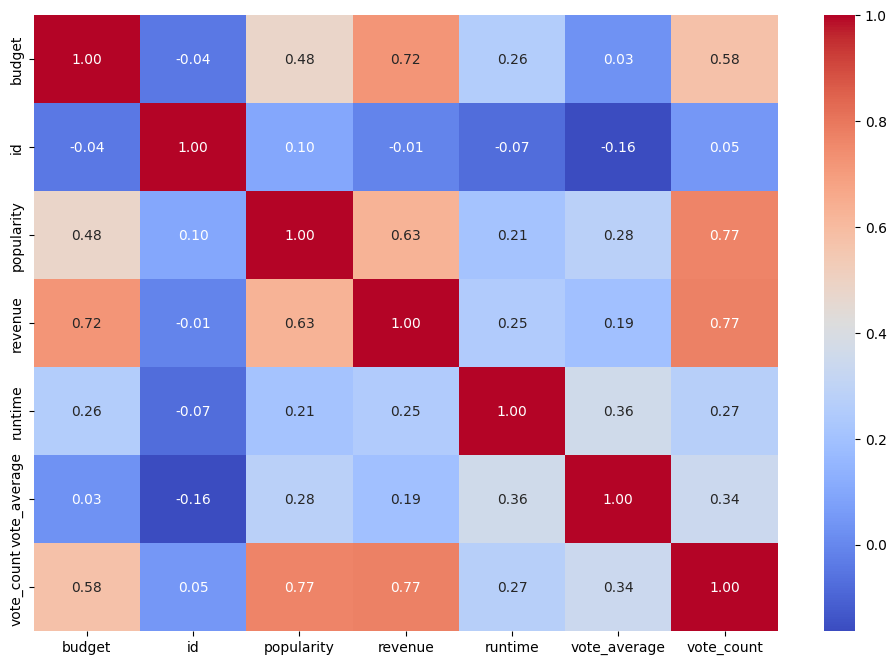

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


# Exploratory Data Analysis (EDA) in numeric columns


 **1. in 'budget'**

Q1. check the distribution of budget

In [ ]:
df['budget'].value_counts()

0           638
20000000    135
30000000    126
25000000    120
40000000    115
           ... 
14600000      1
14800000      1
14200000      1
108           1
220000        1
Name: budget, Length: 411, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

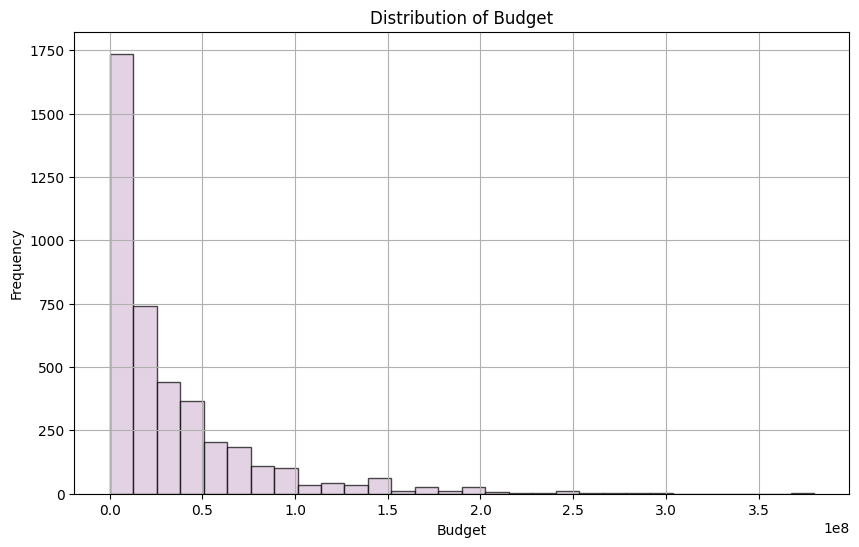

In [115]:
plt.figure(figsize=(10, 6))
plt.hist(df['budget'], bins=30, color='thistle', edgecolor='black', alpha=0.7)
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.title('Distribution of Budget')
plt.grid(True)

# Save the chart as an image file
plt.savefig('budget_distribution.png')  # Provide the desired file name and extension

# Display the chart
plt.show()

result. Most movies were built with almost 1 million dollar

Q2. plot the chart of the budget for the top 10 movies based on popularity

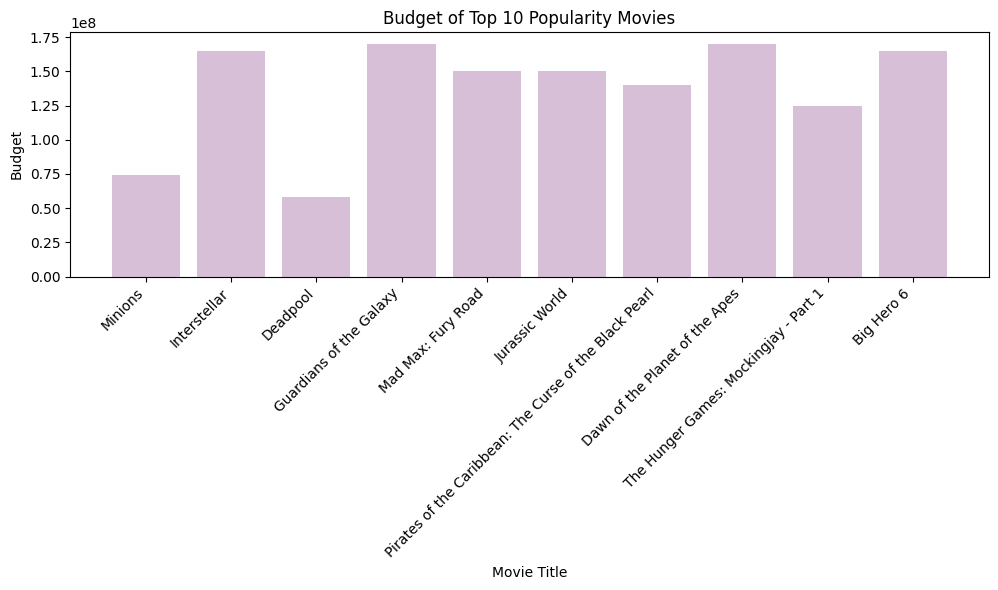

In [116]:
# Sort the DataFrame based on popularity in descending order and extract top 10 rows
top_10_popularity_movies = df.nlargest(10, 'popularity')
# Plotting the budget of top 10 popularity movies with different colors
plt.figure(figsize=(10, 6))
plt.bar(top_10_popularity_movies['original_title'], top_10_popularity_movies['budget'], color='thistle')
plt.xlabel('Movie Title')
plt.ylabel('Budget')
plt.title('Budget of Top 10 Popularity Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_10_popularity_movies_budget.png')  # Provide the desired file name and extension
plt.show()



result2. The Minions was the most popular movies that its budget less than 80 million dollar

Q3. plot the movies with the maximum and minimum budgets

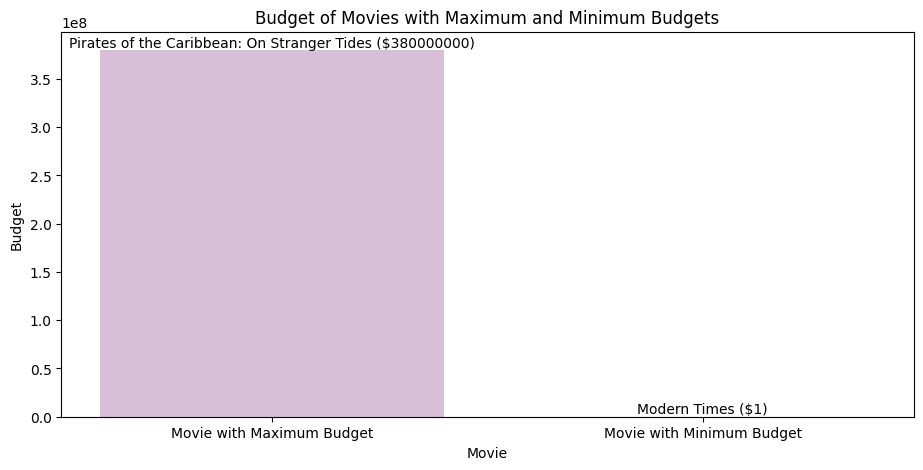

In [117]:
# Find the movie with the minimum budget excluding 0
min_budget_movie = df[df['budget'] > 0].loc[df[df['budget'] > 0]['budget'].idxmin()]
max_budget_movie = df.loc[df['budget'].idxmax()]
# Create a bar plot
plt.figure(figsize=(11, 5))
plt.bar(['Movie with Maximum Budget', 'Movie with Minimum Budget'], [max_budget_movie['budget'], min_budget_movie['budget']], color=['thistle', 'red'])
plt.xlabel('Movie')
plt.ylabel('Budget')
plt.title('Budget of Movies with Maximum and Minimum Budgets')

# Add annotations for movie names and budgets
plt.text(0, max_budget_movie['budget'], f"{max_budget_movie['original_title']} (${max_budget_movie['budget']})", ha='center', va='bottom')
plt.text(1, min_budget_movie['budget'], f"{min_budget_movie['original_title']} (${min_budget_movie['budget']})", ha='center', va='bottom')
plt.savefig('movies_max_min_budget.png')  # Provide the desired file name and extension
plt.show()




result3. pirates of the Caribbean on Stranger Tides was the most expensive movie and The Modern Times was the lowest cost.

Q4. What is the average rating of the 10 most expensive movies?

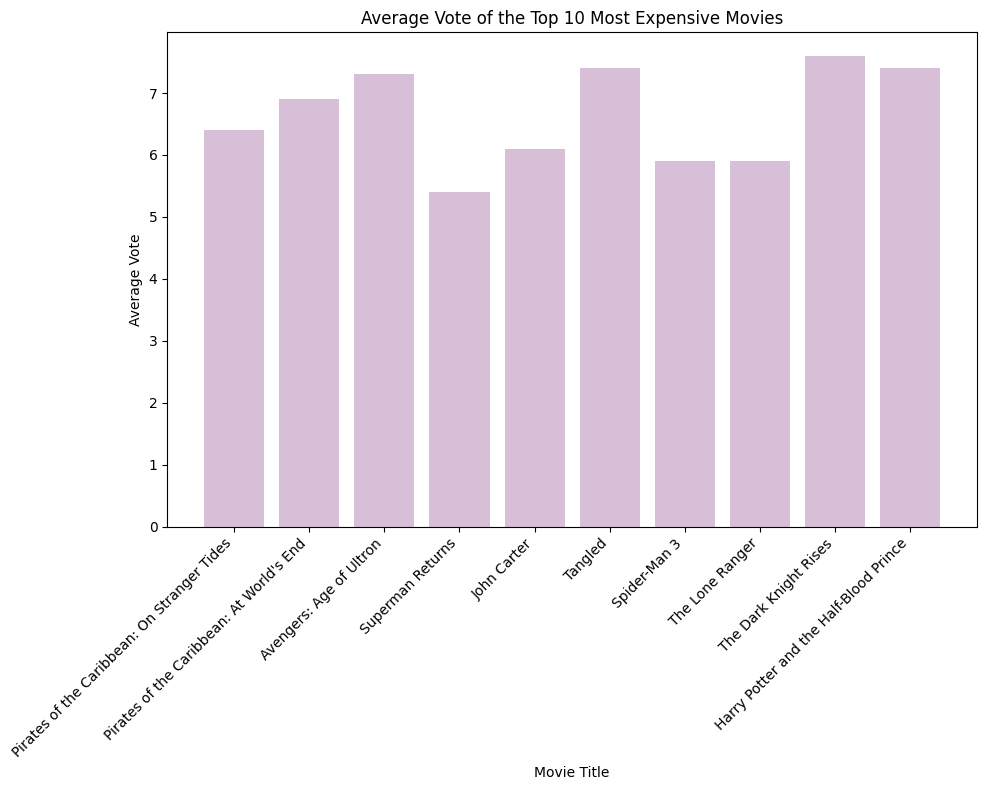

In [118]:
# Sort the DataFrame by 'budget' column to get the top 10 most expensive movies
top_expensive_movies = df.nlargest(10, 'budget')

# Plot the average rating
plt.figure(figsize=(10, 8))
plt.bar(top_expensive_movies['original_title'], top_expensive_movies['vote_average'], color='thistle')
plt.xlabel('Movie Title')
plt.ylabel('Average Vote')
plt.title('Average Vote of the Top 10 Most Expensive Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_10_expensive_movies_vote_average.png')  # Provide the desired file name and extension
plt.show()


result4. The Dark Knight Rises has most average rating

Q5. How many votes did the 10 most expensive movies have?

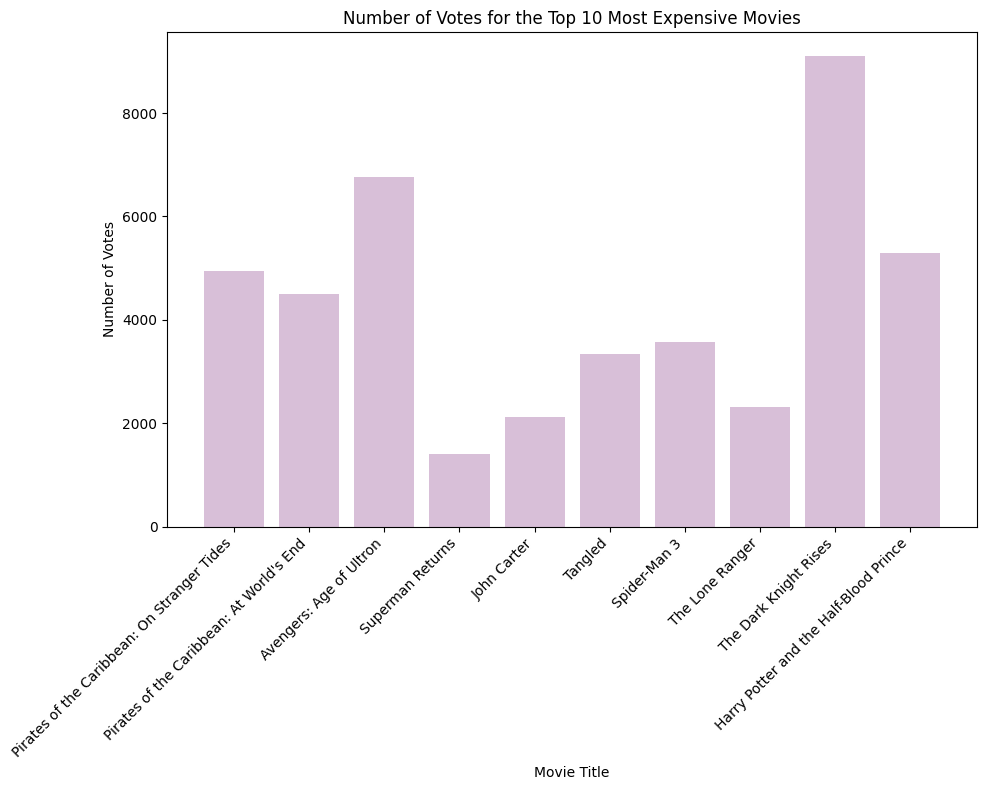

In [119]:
# Sort the DataFrame by 'budget' column to get the top 10 most expensive movies
top_expensive_movies = df.nlargest(10, 'budget')

# Plot the number of votes
plt.figure(figsize=(10, 8))
plt.bar(top_expensive_movies['original_title'], top_expensive_movies['vote_count'], color='thistle')
plt.xlabel('Movie Title')
plt.ylabel('Number of Votes')
plt.title('Number of Votes for the Top 10 Most Expensive Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Save the plot as an image file
plt.savefig('top_10_expensive_movies_vote_count.png')  # Provide the desired file name and extension
plt.show()


result5. more than 8000 for The Dark knight rises

**2. In 'revenue'**

Q1.

In [ ]:
df['revenue'].value_counts()

0            930
7000000        6
8000000        6
12000000       5
100000000      5
            ... 
36893721       1
12342632       1
11087569       1
215000000      1
2040920        1
Name: revenue, Length: 3156, dtype: int64

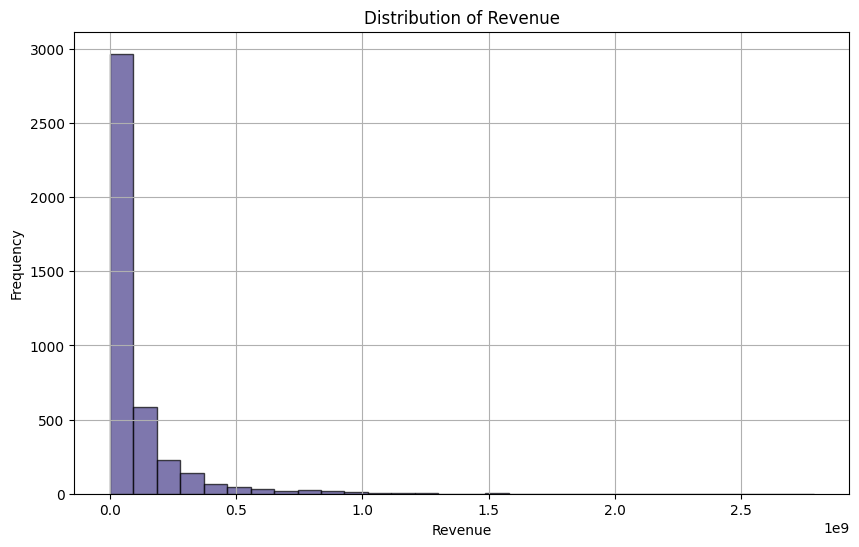

In [ ]:
# Plot the distribution of revenue using a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['revenue'], bins=30, color='darkslateblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

result1.

Q2. compare the budget and revenue of the movies

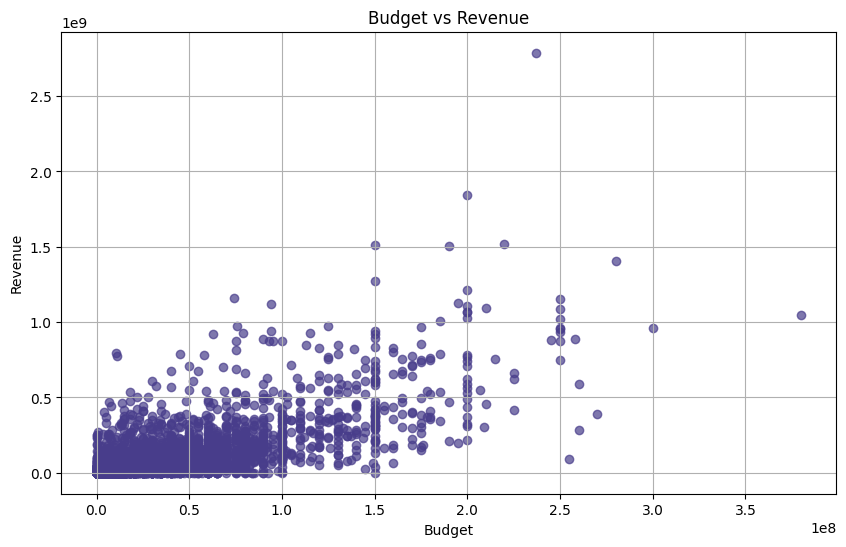

In [120]:
# Plot budget vs revenue using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['budget'], df['revenue'], color='darkslateblue', alpha=0.7)
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.grid(True)
plt.savefig('budget_vs_revenue_scatter.png')
plt.show()


result2. This scatter plot shows the relationship between the budget and revenue of movies. Each point on the plot represents a movie, where the x-coordinate represents the budget of the movie and the y-coordinate represents its revenue.

Q3. Plot top 10 revenue movies

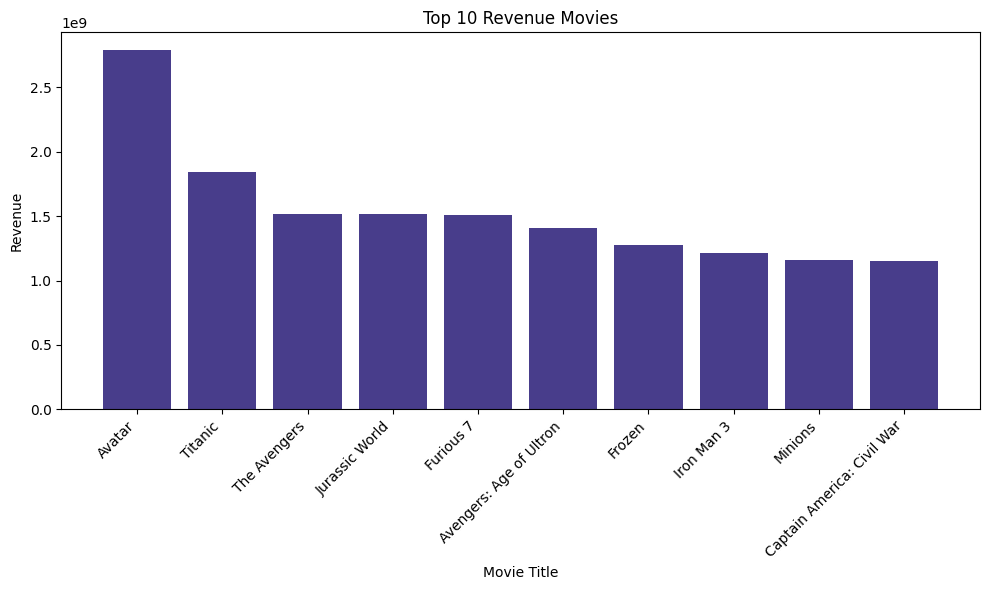

In [121]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' containing movie data
# Extract the top 10 revenue movies
top_10_revenue_movies = df.nlargest(10, 'revenue')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_10_revenue_movies['original_title'], top_10_revenue_movies['revenue'], color='darkslateblue')
plt.xlabel('Movie Title')
plt.ylabel('Revenue')
plt.title('Top 10 Revenue Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_10_revenue_movies_bar.png')
plt.show()


result3. It is avatar

Q4. plot the top 10 revenue movies along with their budgets

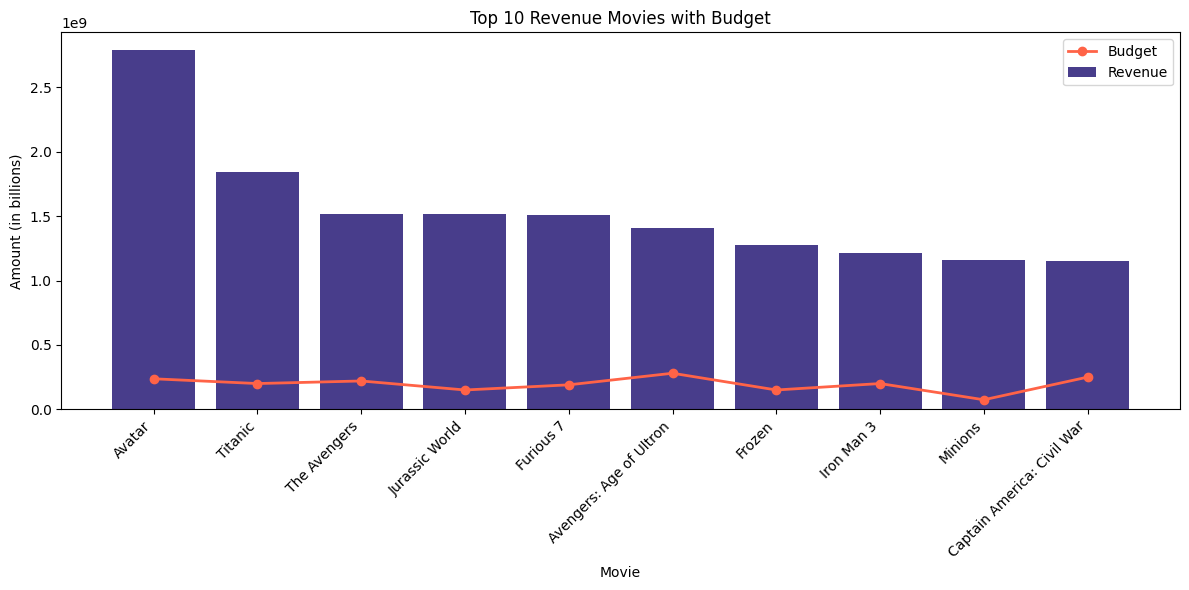

In [122]:
import pandas as pd

top_10_revenue_movies = df.nlargest(10, 'revenue')
# Extract movie names, revenue, and budget
movie_names = top_10_revenue_movies['original_title']
revenue = top_10_revenue_movies['revenue']
budget = top_10_revenue_movies['budget']

# Plotting
plt.figure(figsize=(12, 6))

# Plot revenue
plt.bar(movie_names, revenue, color='darkslateblue', label='Revenue')

# Plot budget as a line plot on the same chart
plt.plot(movie_names, budget, color='tomato', marker='o', label='Budget', linewidth=2)

# Adding labels and title
plt.xlabel('Movie')
plt.ylabel('Amount (in billions)')
plt.title('Top 10 Revenue Movies with Budget')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Show plot
plt.tight_layout()
plt.savefig('top_10_revenue_movies_with_budget.png')
plt.show()



It shows top 10 movies were completely profitable

Q5. To plot the revenue of the top popularity movies

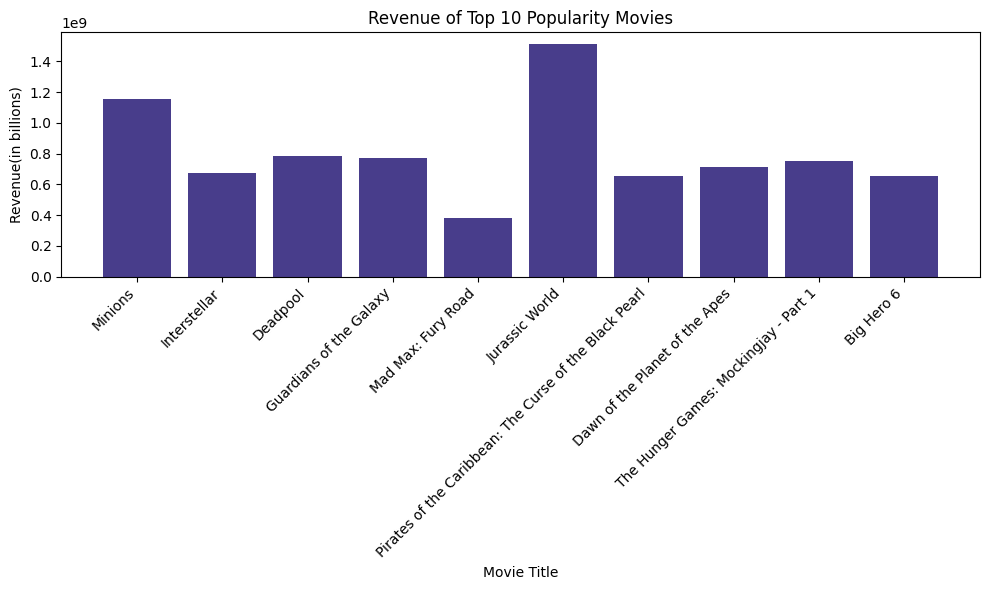

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the movie data
# Sort the DataFrame by 'popularity' to get the top popularity movies
top_popularity_movies = df.sort_values(by='popularity', ascending=False).head(10)

# Extract the revenue of the top popularity movies
revenue = top_popularity_movies['revenue']

# Plot the revenue values
plt.figure(figsize=(10, 6))
plt.bar(top_popularity_movies['original_title'], revenue, color='darkslateblue')
plt.xlabel('Movie Title')
plt.ylabel('Revenue(in billions)')
plt.title('Revenue of Top 10 Popularity Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_10_popularity_movies_revenue.png')
plt.show()


result5. It is Jurassic World

Q6. plot the relationship between the vote average and vote count of the movies based on their revenue

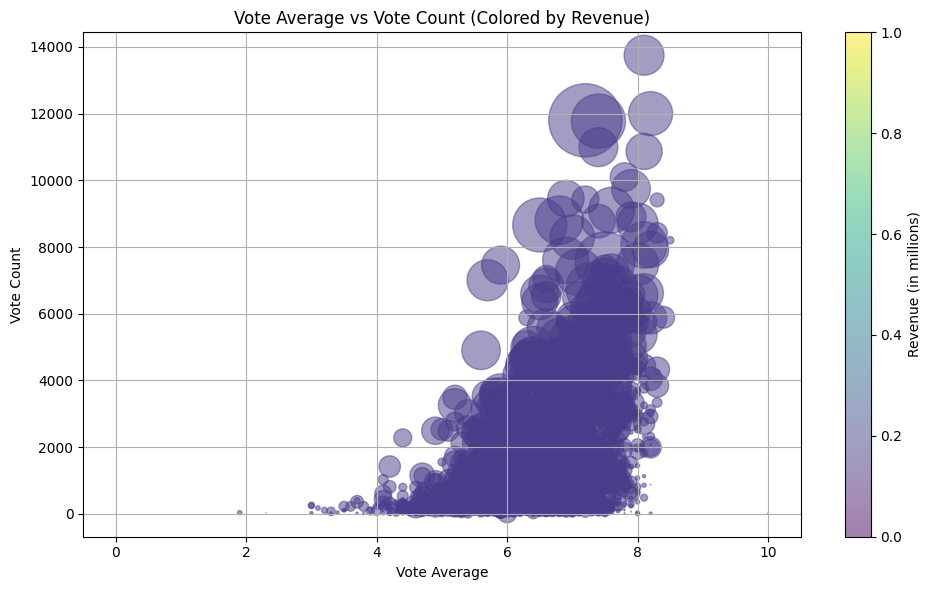

In [124]:
vote_average = df['vote_average']
vote_count = df['vote_count']
revenue = df['revenue']

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(vote_average, vote_count, s=revenue/1000000, alpha=0.5, c='darkslateblue')
plt.xlabel('Vote Average')
plt.ylabel('Vote Count')
plt.title('Vote Average vs Vote Count (Colored by Revenue)')
plt.colorbar(label='Revenue (in millions)')
plt.grid(True)
plt.tight_layout()
plt.savefig('vote_average_vs_vote_count.png')
plt.show()


result6. It shows the relationship between the vote average and vote count of the movies based on their revenue. Each point on the plot  represents a movie, with the x-coordinate representing the vote average and the y-coordinate representing the vote count. the size of each point represents the revenue of the corresponding movie

**3. in runtime**

In [ ]:
df['runtime'].value_counts()

100.0    130
98.0     123
97.0     116
90.0     107
95.0     106
        ... 
194.0      1
338.0      1
216.0      1
200.0      1
64.0       1
Name: runtime, Length: 149, dtype: int64

Q1. Shows distribution of runtime

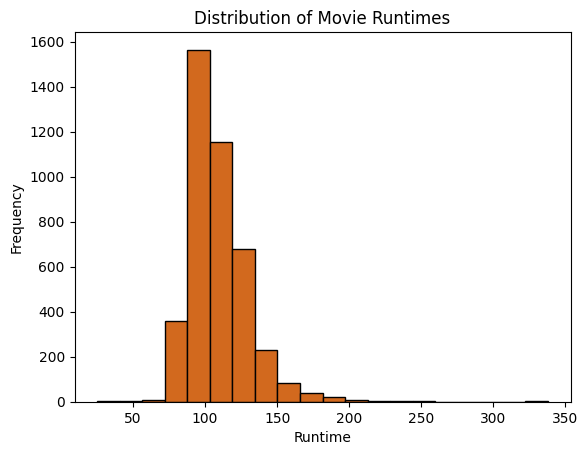

In [ ]:
# Plotting the histogram
plt.hist(df['runtime'], bins=20, color='chocolate', edgecolor='black')

# Adding labels and title
plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Runtimes')

# Displaying the plot
plt.show()

result1. The length of most movies is between 90 to 120 minutes

Q2. relationship between runtime and revenue

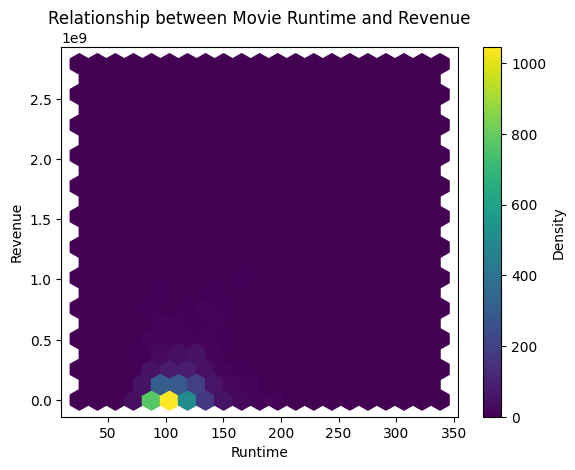

In [ ]:
# Plotting the hexbin plot
plt.hexbin(df['runtime'], df['revenue'], gridsize=20, cmap='viridis')
# Adding labels and title
plt.xlabel('Runtime')
plt.ylabel('Revenue')
plt.title('Relationship between Movie Runtime and Revenue')
# Adding a color bar
plt.colorbar(label='Density')
# Displaying the plot
plt.show()

result2. x-axis represents the runtime of movies, the y-axis represents the revenue, and the color intensity indicates the density of points. Areas with darker colors have a higher density of points, while areas with lighter colors have a lower density.
Most profitable movies were between 90 to 120 minutes

Q3. isualize the relationship between average vote and runtime


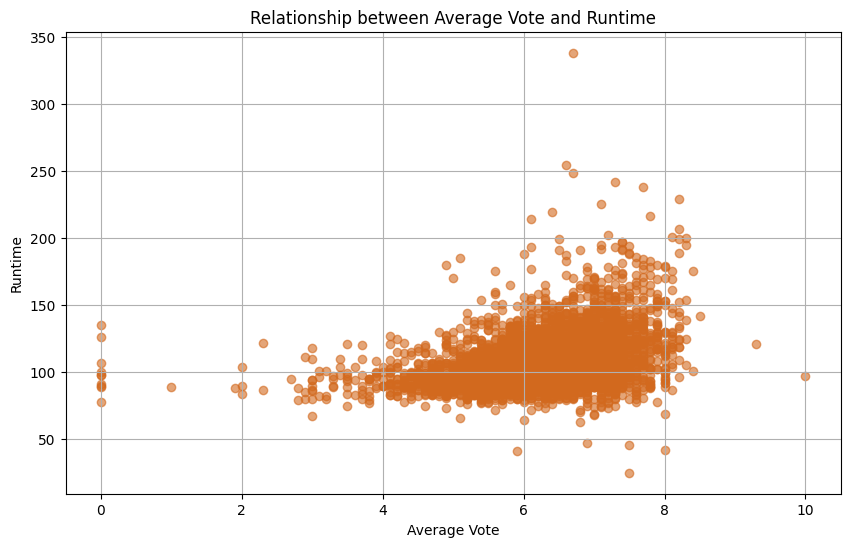

In [ ]:
# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['vote_average'], df['runtime'], color='chocolate', alpha=0.6)

# Adding labels and title
plt.xlabel('Average Vote')
plt.ylabel('Runtime')
plt.title('Relationship between Average Vote and Runtime')

# Displaying the plot
plt.grid(True)
plt.show()

result3. Movies that their average-vote are  between 4 and 6, usually their runtime are between 90 to 120 minutes

## **Exploratory Data Analysis (EDA) in non-numeric columns**




**in genres**

Q1. plot the distribution of genres

In [ ]:
df['genres'].value_counts()

In [126]:
# Extract genre names from the 'genres' column
genre_list = df['genres'].apply(lambda x: [genre['name'] for genre in eval(x)])

# Flatten the list of genre names
all_genres = [genre for sublist in genre_list for genre in sublist]

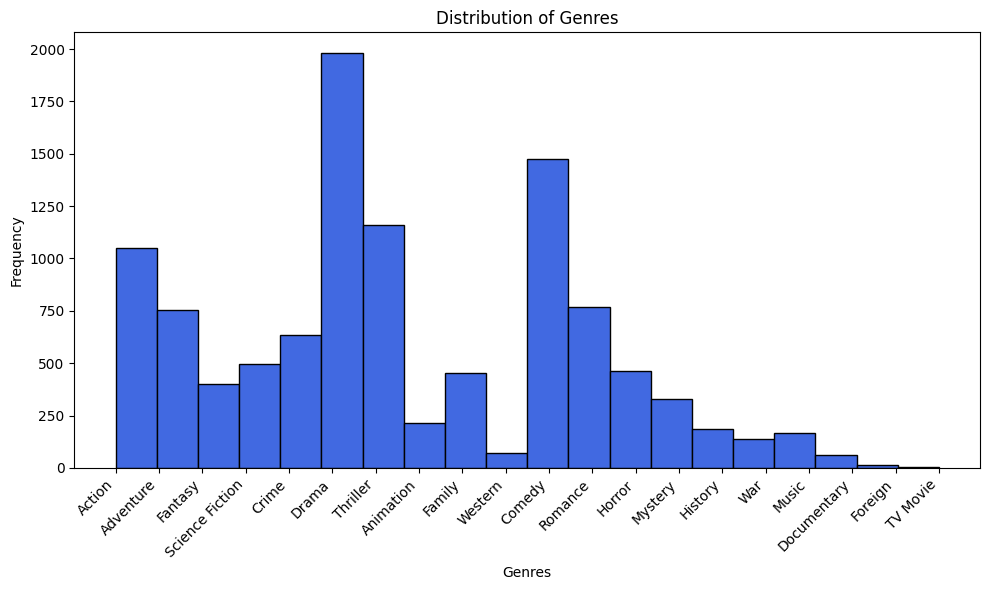

In [127]:
# Plot the distribution of genres using a histogram
plt.figure(figsize=(10, 6))
plt.hist(all_genres, color='royalblue', edgecolor='black', bins=len(set(all_genres)))  # Use unique bins for each genre
plt.title('Distribution of Genres')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Save the plot as an image file
plt.savefig('distribution_of_genres.png')
plt.show()


result1. The most frequent genres are Drama and Thriller

Q2. plot the top 10 genres based on popularity,

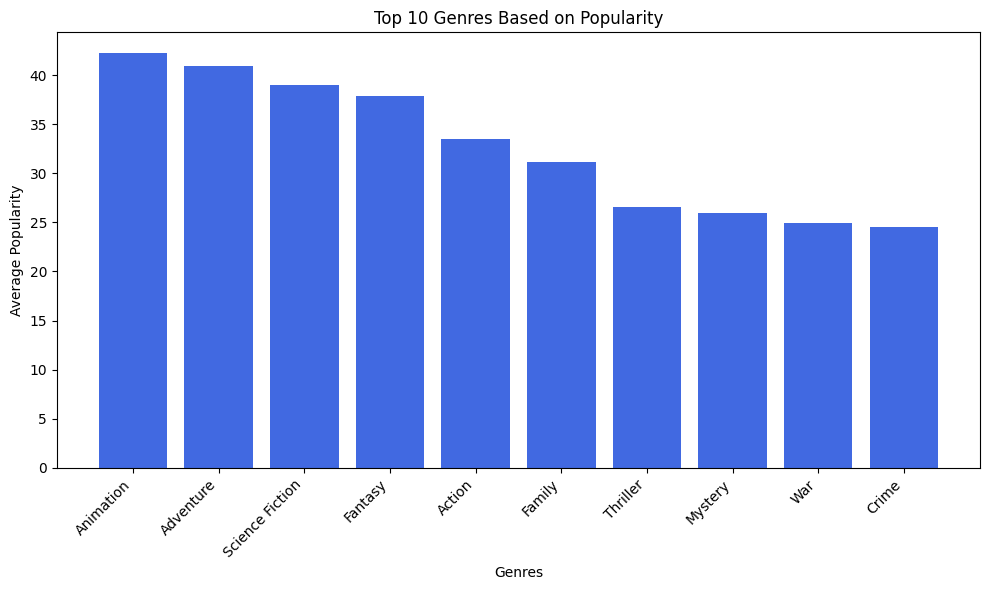

In [128]:
# Extract genre names and popularity from the dataset
genre_popularity = df[['genres', 'popularity']]

# Create a dictionary to store the total popularity and count of movies for each genre
genre_counts = {}
for index, row in genre_popularity.iterrows():
    genres = row['genres']
    popularity = row['popularity']
    for genre in eval(genres):
        genre_name = genre['name']
        if genre_name not in genre_counts:
            genre_counts[genre_name] = {'total_popularity': 0, 'count': 0}
        genre_counts[genre_name]['total_popularity'] += popularity
        genre_counts[genre_name]['count'] += 1

# Calculate the average popularity for each genre
average_popularity = {genre: counts['total_popularity'] / counts['count'] for genre, counts in genre_counts.items()}

# Sort genres based on average popularity and select the top 10
top_10_genres = sorted(average_popularity, key=average_popularity.get, reverse=True)[:10]
top_10_popularity = [average_popularity[genre] for genre in top_10_genres]

# Plot the top 10 genres based on popularity
plt.figure(figsize=(10, 6))
plt.bar(top_10_genres, top_10_popularity, color='royalblue')
plt.title('Top 10 Genres Based on Popularity')
plt.xlabel('Genres')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_10_genres_popularity.png')
plt.show()


result2. Most popular genres are Animation and Advanture

Q3. plot the genres of the movie with the highest and lowest revenue

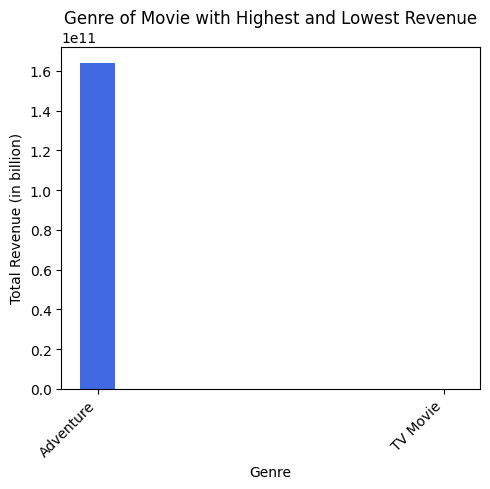

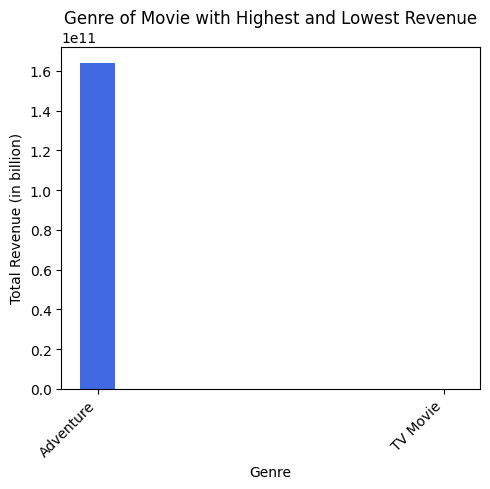

In [130]:
# Extract genre names and revenue from the dataset
genre_revenue = df[['genres', 'revenue']]

# Create a dictionary to store the total revenue for each genre
genre_total_revenue = {}
for index, row in genre_revenue.iterrows():
    genres = row['genres']
    revenue = row['revenue']
    for genre in eval(genres):
        genre_name = genre['name']
        if genre_name not in genre_total_revenue:
            genre_total_revenue[genre_name] = 0
        genre_total_revenue[genre_name] += revenue

# Find the genre with the highest and lowest total revenue
highest_revenue_genre = max(genre_total_revenue, key=genre_total_revenue.get)
lowest_revenue_genre = min(genre_total_revenue, key=genre_total_revenue.get)

# Plot the genres of the movie with the highest and lowest revenue
plt.figure(figsize=(5, 5))
plt.bar([highest_revenue_genre, lowest_revenue_genre], [genre_total_revenue[highest_revenue_genre], genre_total_revenue[lowest_revenue_genre]], color=['royalblue', 'red'], width=0.1)
plt.title('Genre of Movie with Highest and Lowest Revenue')
plt.xlabel('Genre')
plt.ylabel('Total Revenue (in billion)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('genre_revenue_comparison.png')
plt.show()

result3. the genres of the movie with the highest revenue is Advanture and lowest revenue is TV movie

Q4. visualize the genres of movies with the highest and lowest budgets

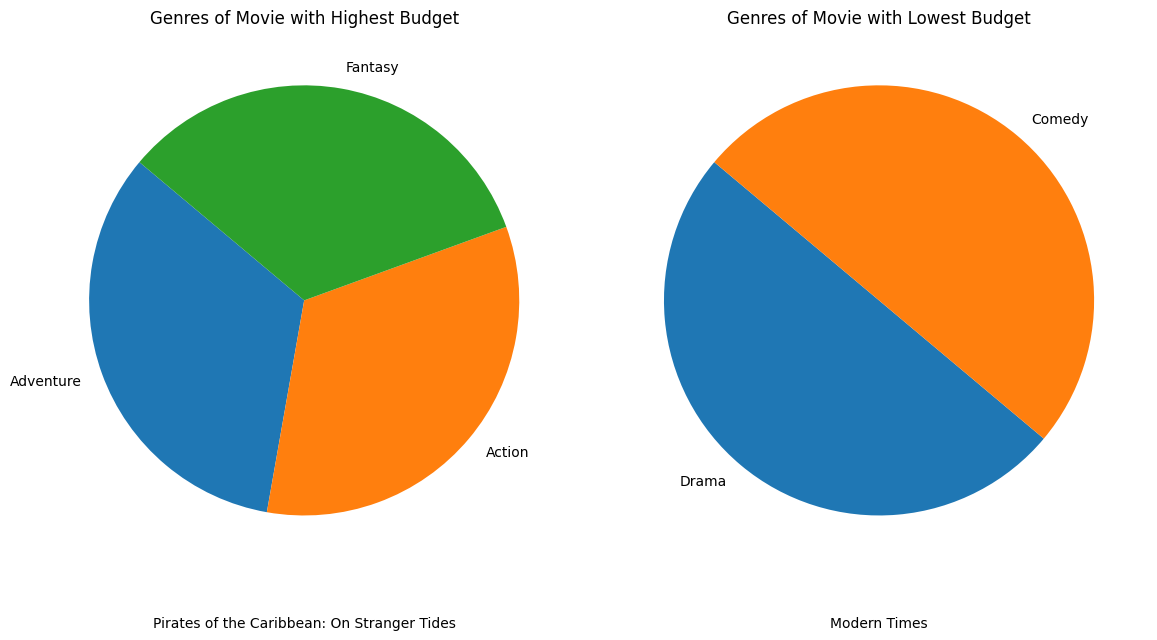

In [131]:
# Filter out movies with budget greater than 0
filtered_df = df[df['budget'] > 0]

# Find the movie with the highest budget
highest_budget_movie = filtered_df.loc[filtered_df['budget'].idxmax()]

# Find the movie with the lowest budget
lowest_budget_movie = filtered_df.loc[filtered_df['budget'].idxmin()]

# Extract genres for highest budget movie
highest_budget_genres = [genre['name'] for genre in eval(highest_budget_movie['genres'])]

# Extract genres for lowest budget movie
lowest_budget_genres = [genre['name'] for genre in eval(lowest_budget_movie['genres'])]

# Count occurrence of each genre
highest_budget_genre_counts = pd.Series(highest_budget_genres).value_counts()
lowest_budget_genre_counts = pd.Series(lowest_budget_genres).value_counts()

# Plot pie chart for highest budget movie genres
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(highest_budget_genre_counts, labels=highest_budget_genre_counts.index, autopct='', startangle=140)
plt.title('Genres of Movie with Highest Budget')
plt.text(0, -1.5, highest_budget_movie['original_title'], horizontalalignment='center', verticalalignment='center')

# Plot pie chart for lowest budget movie genres
plt.subplot(1, 2, 2)
plt.pie(lowest_budget_genre_counts, labels=lowest_budget_genre_counts.index, autopct='', startangle=140)
plt.title('Genres of Movie with Lowest Budget')
plt.text(0, -1.5, lowest_budget_movie['original_title'], horizontalalignment='center', verticalalignment='center')

plt.tight_layout()
plt.savefig('genre_budget_comparison.png')
plt.show()




result4. The movie with the highest budget is Pirates of Caribbean: On Stranger Tides and its genres are Fantasy, Advanture, and Action, and the movie with the lowest budget is Modern Times  and its genres are Drama and comedy

**in release_date**

In [ ]:
df['release_date'].value_counts()

2014-12-25    7
2013-07-18    7
2004-09-03    6
2011-09-30    6
1998-12-25    5
             ..
1979-06-26    1
2014-02-26    1
2015-07-28    1
2002-12-26    1
2013-10-13    1
Name: release_date, Length: 3008, dtype: int64

Q1. distribution of release_date

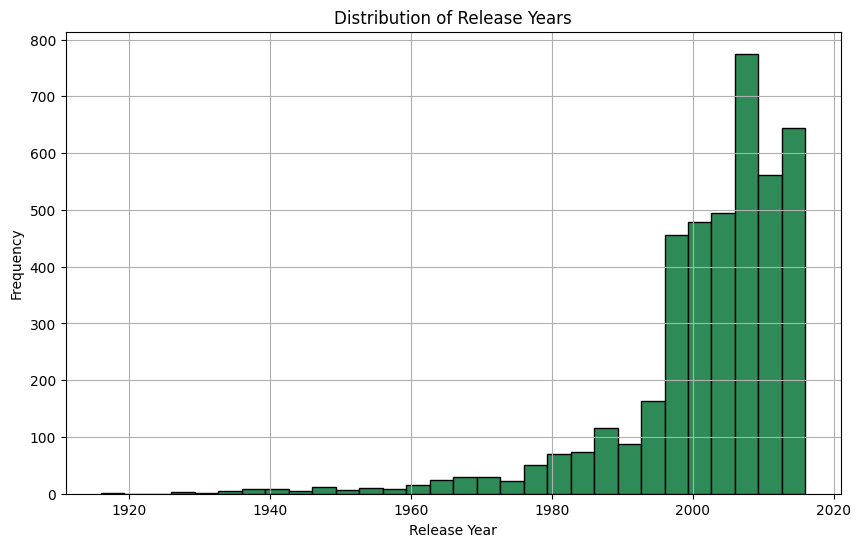

In [ ]:
# Convert release_date to datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract the release year from the release_date column
release_years = df['release_date'].dt.year

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(release_years, bins=30, color='seagreen', edgecolor='black')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Most movies were released between 2000 to 2020

Q2. plot the year of releas the most and least popular movies

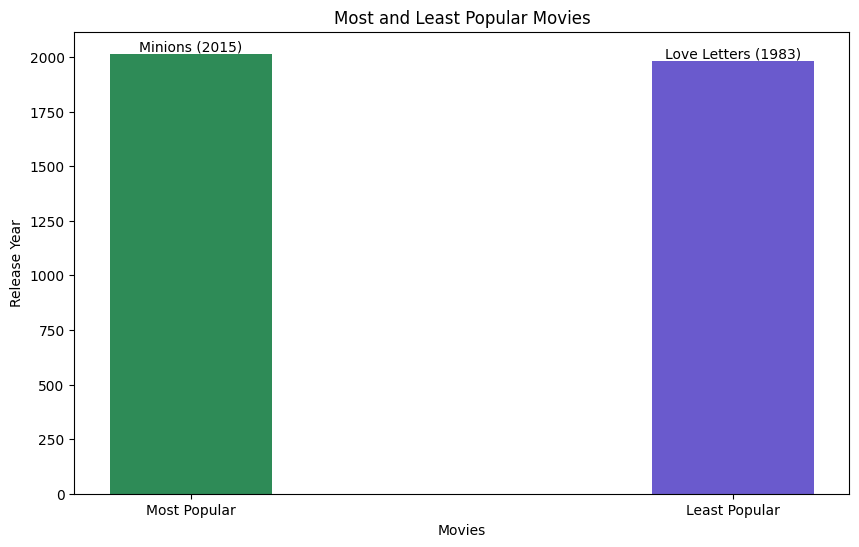

In [ ]:
# Find the most and least popular movies
most_popular_movie = df.loc[df['popularity'].idxmax()]
least_popular_movie = df.loc[df['popularity'].idxmin()]

# Extract movie names and release years
most_popular_name = most_popular_movie['original_title']
least_popular_name = least_popular_movie['original_title']
most_popular_year = pd.to_datetime(most_popular_movie['release_date']).year
least_popular_year = pd.to_datetime(least_popular_movie['release_date']).year

# Plot the release years
plt.figure(figsize=(10, 6))
plt.bar(['Most Popular', 'Least Popular'], [most_popular_year, least_popular_year], color=['seagreen', 'slateblue'],width=0.3)
plt.title('Most and Least Popular Movies')
plt.xlabel('Movies')
plt.ylabel('Release Year')

# Annotate the plot with movie names and exact release years
plt.text(0, most_popular_year, f"{most_popular_name} ({most_popular_year})", ha='center', va='bottom')
plt.text(1, least_popular_year, f"{least_popular_name} ({least_popular_year})", ha='center', va='bottom')

plt.show()


The most Popular is Minions in 2015, and the least Popular is Love Letters in 1983

Q3. plot the names and release years of the movies with the maximum and minimum average votes

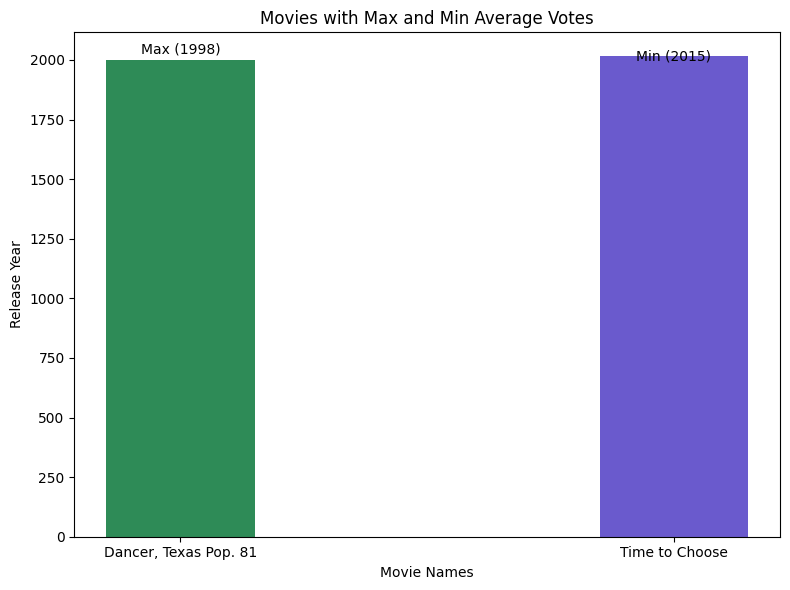

In [ ]:
# Find the movie with the maximum and minimum average votes
max_avg_vote_movie = df.loc[df['vote_average'].idxmax()]
min_avg_vote_movie = df.loc[df['vote_average'].idxmin()]

# Extract movie names and release years
max_avg_vote_name = max_avg_vote_movie['original_title']
min_avg_vote_name = min_avg_vote_movie['original_title']
max_avg_vote_year = pd.to_datetime(max_avg_vote_movie['release_date']).year
min_avg_vote_year = pd.to_datetime(min_avg_vote_movie['release_date']).year

# Plot the release years
plt.figure(figsize=(8, 6))
plt.bar([max_avg_vote_name, min_avg_vote_name], [max_avg_vote_year, min_avg_vote_year], color=['seagreen', 'slateblue'], width=0.3)
plt.title('Movies with Max and Min Average Votes')
plt.xlabel('Movie Names')
plt.ylabel('Release Year')

# Annotate the plot with movie names and exact release years
plt.text(0, most_popular_year, f"Max ({max_avg_vote_year})", ha='center', va='bottom')
plt.text(1, least_popular_year, f"Min ({min_avg_vote_year})", ha='center', va='bottom')

plt.tight_layout()
plt.show()


result3. The the maximum average votes is Dancer, Texas Pop.81 in 1998, and the minimum average votes is Time to Choose in 2015

Q4. plot the names and release years of the top 10 revenue movies

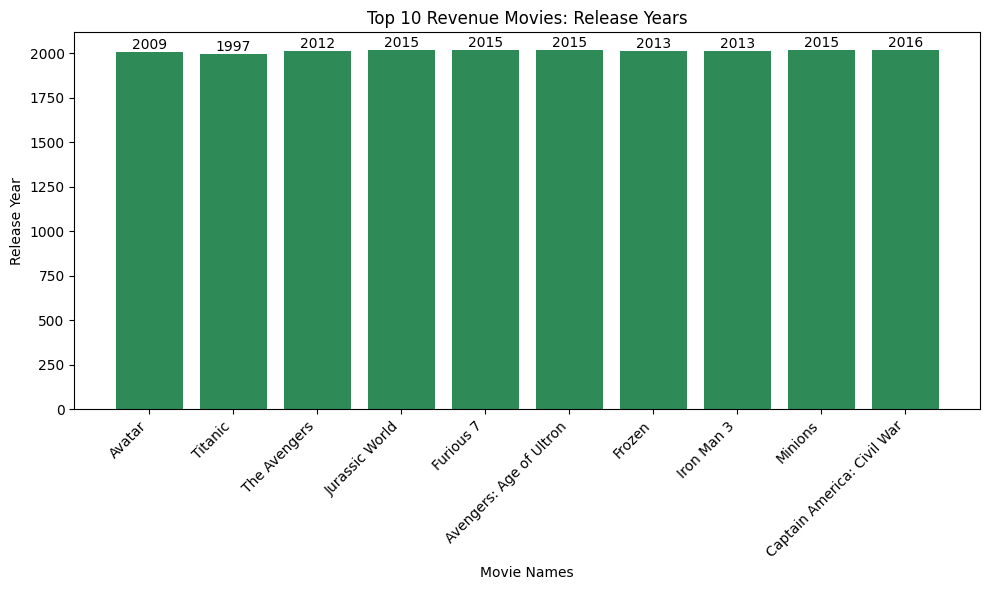

In [ ]:
# Select the top 10 revenue movies
top_10_revenue_movies = df.nlargest(10, 'revenue')

# Extract movie names and release years
movie_names = top_10_revenue_movies['original_title']
release_years = pd.to_datetime(top_10_revenue_movies['release_date']).dt.year

# Plot the release years
plt.figure(figsize=(10, 6))
bars = plt.bar(movie_names, release_years, color='seagreen')
plt.title('Top 10 Revenue Movies: Release Years')
plt.xlabel('Movie Names')
plt.ylabel('Release Year')

# Annotate bars with release years
for bar, year in zip(bars, release_years):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, str(year), ha='center', va='bottom')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


**in crew**

Q1. show the director and writer of the top 10 movies based on revenue

In [ ]:
# Separate the director and writer from the "crew" column
top_10_revenue_movies['director'] = top_10_revenue_movies['crew'].apply(
    lambda crew_list: next((member['name'] for member in eval(crew_list) if member['job'] == 'Director'), None)
)
top_10_revenue_movies['writer'] = top_10_revenue_movies['crew'].apply(
    lambda crew_list: next((member['name'] for member in eval(crew_list) if member['job'] == 'Writer'), ' ')
    if any(member['job'] == 'Writer' for member in eval(crew_list)) else ' '
)

# Show the director and writer of the top 10 revenue movies
for index, row in top_10_revenue_movies.iterrows():
    print(f"Movie: {row['original_title']}, Director: {row['director']}, Writer: {row['writer']}")



Movie: Avatar, Director: James Cameron, Writer: James Cameron
Movie: Titanic, Director: James Cameron, Writer:  
Movie: The Avengers, Director: Joss Whedon, Writer:  
Movie: Jurassic World, Director: Colin Trevorrow, Writer:  
Movie: Furious 7, Director: James Wan, Writer: Chris Morgan
Movie: Avengers: Age of Ultron, Director: Joss Whedon, Writer: Joss Whedon
Movie: Frozen, Director: Chris Buck, Writer:  
Movie: Iron Man 3, Director: Shane Black, Writer:  
Movie: Minions, Director: Kyle Balda, Writer: Brian Lynch
Movie: Captain America: Civil War, Director: Anthony Russo, Writer:  


result1. Movie: Avatar
Director: James Cameron
, Writer: James Cameron

Movie: Titanic
Director: James Cameron
, Writer: ''

Movie: The Avengers
Director: Joss Whedon
Writer: ''

Movie: Jurassic World
Director: Colin Trevorrow
, Writer: ''

Movie: Furious 7
Director: James Wan
, Writer: Chris Morgan

Movie: Avengers: Age of Ultron
Director: Joss Whedon
, Writer: Joss Whedon

Movie: Frozen
Director: Chris Buck
, Writer: ''

Movie: Iron Man 3
Director: Shane Black
, Writer: ''

Movie: Minions
Director: Kyle Balda
, Writer: Brian Lynch

Movie: Captain America: Civil War
Director: Anthony Russo
, Writer: ''

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4159 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4159 non-null   int64         
 1   genres                4159 non-null   object        
 2   homepage              4159 non-null   object        
 3   id                    4159 non-null   int64         
 4   keywords              4159 non-null   object        
 5   original_language     4159 non-null   object        
 6   original_title        4159 non-null   object        
 7   overview              4159 non-null   object        
 8   popularity            4159 non-null   float64       
 9   production_companies  4159 non-null   object        
 10  production_countries  4159 non-null   object        
 11  release_date          4159 non-null   datetime64[ns]
 12  revenue               4159 non-null   int64         
 13  runtime           

In [ ]:
df['crew'].value_counts()

# **Select features, Train and evaluat models**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr

Logistic Regression:
Accuracy: 0.9987980769230769
Precision: 1.0
Recall: 0.9980430528375733
F1-Score: 0.999020568070519
ROC-AUC: 0.9990215264187867

Decision Tree:
Accuracy: 0.9855769230769231
Precision: 0.9882583170254403
Recall: 0.9882583170254403
F1-Score: 0.9882583170254403
ROC-AUC: 0.9847833641201967

Random Forest:
Accuracy: 0.9783653846153846
Precision: 0.9786407766990292
Recall: 0.9863013698630136
F1-Score: 0.9824561403508772
ROC-AUC: 0.9760167285452139

XGBoost:
Accuracy: 0.9807692307692307
Precision: 0.9881656804733728
Recall: 0.9804305283757339
F1-Score: 0.9842829076620825
ROC-AUC: 0.9808694697953436

Testing Logistic Regression:
Accuracy: 0.9987980769230769
Precision: 1.0
Recall: 0.9980430528375733
F1-Score: 0.999020568070519
ROC-AUC: 0.9990215264187867

Testing Decision Tree:
Accuracy: 0.984375
Precision: 0.9901574803149606
Recall: 0.9843444227005871
F1-Score: 0.9872423945044161
ROC-AUC: 0.984384049356524

Testing Random Forest:
Accuracy: 0.9855769230769231
Precision: 0.98

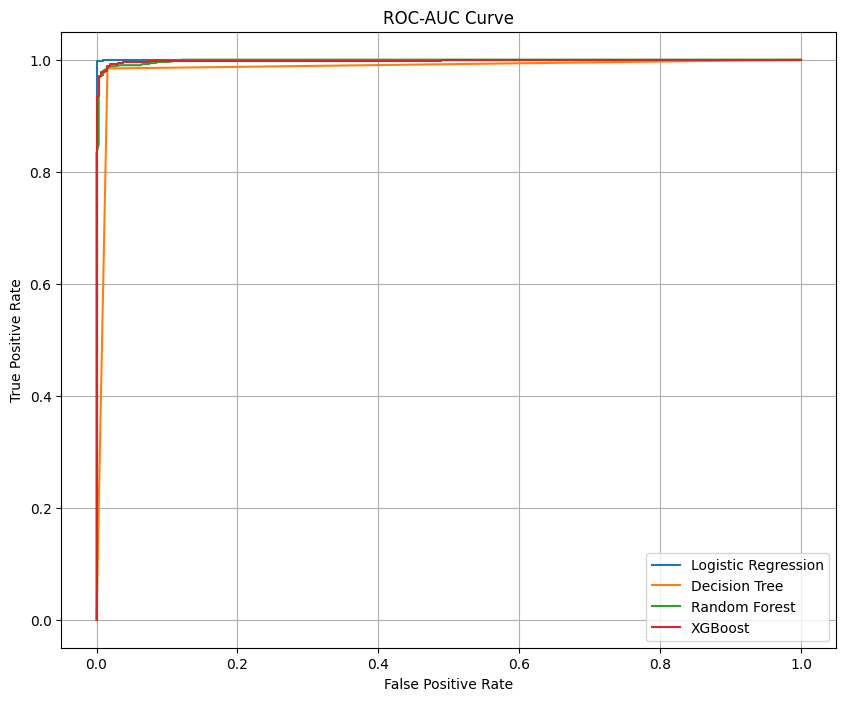

In [32]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import joblib

def train_model(X_train, y_train, model_name):
    models = {
        'Logistic Regression': LogisticRegression(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'XGBoost': XGBClassifier()
    }
    model = models[model_name]
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    best_score_index = scores.argmax()  # Index of the fold with the highest accuracy
    model.fit(X_train, y_train)  # Train on the entire training set
    return model

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    return accuracy, precision, recall, f1, roc_auc

def plot_roc_curve(model, X_test, y_test, model_name):
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr, label=model_name)

def test_models(X_test, y_test, best_models):
    for model_name, model in best_models.items():
        accuracy, precision, recall, f1, roc_auc = evaluate_model(model, X_test, y_test)
        print(f'Testing {model_name}:')
        print(f'Accuracy: {accuracy}')
        print(f'Precision: {precision}')
        print(f'Recall: {recall}')
        print(f'F1-Score: {f1}')
        print(f'ROC-AUC: {roc_auc}')
        print()

def main():
    # Create target variable indicating profitability
    df['profitable'] = (df['revenue'] - df['budget'] > 0).astype(int)

    # Encode 'profitable' column as 0 for non-profitable movies and 1 for profitable movies
    df['profitable'] = df['profitable'].apply(lambda x: 1 if x else 0)

    # Feature selection
    features = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']
    X = df[features]
    y = df['profitable']

    # Split data into train and test sets
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Train models and select best models based on validation data
    best_models = {}
    for model_name in ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']:
        model = train_model(X_train, y_train, model_name)
        accuracy, precision, recall, f1, roc_auc = evaluate_model(model, X_val, y_val)
        print(f'{model_name}:')
        print(f'Accuracy: {accuracy}')
        print(f'Precision: {precision}')
        print(f'Recall: {recall}')
        print(f'F1-Score: {f1}')
        print(f'ROC-AUC: {roc_auc}')
        print()
        best_models[model_name] = model

    # Test best models
    test_models(X_test, y_test, best_models)

    # Plot ROC-AUC curves for best models
    plt.figure(figsize=(10, 8))
    for model_name, model in best_models.items():
        plot_roc_curve(model, X_test, y_test, model_name)

    # Plot settings
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC Curve')
    plt.legend()
    plt.grid()
    plt.show()

    # Save the best model for each algorithm
    for model_name, model in best_models.items():
        joblib.dump(model, f'{model_name}_model.pkl')

if __name__ == '__main__':
    main()


# **Recommendation System**

In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4159 entries, 0 to 4802
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   genres          4159 non-null   object
 1   id              4159 non-null   int64 
 2   keywords        4159 non-null   object
 3   original_title  4159 non-null   object
 4   overview        4159 non-null   object
 5   cast            4159 non-null   object
 6   crew            4159 non-null   object
dtypes: int64(1), object(6)
memory usage: 259.9+ KB


In the first step, I will check and select the features that can be useful and help to train a model to suggest the top 5 movies based on the movie name that the user enters and cosine similarity.

Drop budget. this feature can not help to recommand movie to user

In [54]:
df2=df.copy()

In [55]:
df2.drop(columns=['budget'], inplace=True)

I will drop ['vote_average', 'vote_count', 'popularity'] because I do not know which user has this voting and I believe it can not help to recommend a movie.

In [56]:
df2.drop(columns=['vote_average', 'vote_count', 'popularity'], inplace=True)

In [57]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4159 entries, 0 to 4802
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   genres                4159 non-null   object 
 1   homepage              4159 non-null   object 
 2   id                    4159 non-null   int64  
 3   keywords              4159 non-null   object 
 4   original_language     4159 non-null   object 
 5   original_title        4159 non-null   object 
 6   overview              4159 non-null   object 
 7   production_companies  4159 non-null   object 
 8   production_countries  4159 non-null   object 
 9   release_date          4159 non-null   object 
 10  revenue               4159 non-null   int64  
 11  runtime               4159 non-null   float64
 12  spoken_languages      4159 non-null   object 
 13  tagline               4159 non-null   object 
 14  cast                  4159 non-null   object 
 15  crew                 

Now, I will drop another features whome I believe can not help me to recommand movies based on the name of the movie

In [58]:
df2.drop(columns=['homepage', 'original_language', 'production_companies','production_countries',
              'release_date','revenue', 'runtime','spoken_languages','tagline','profitable'], inplace=True)

# **Text Preprocessing to prepare data for the recommender model**

In [ ]:
df2.info()

# **in genres**

In [60]:
# Extract names from the list of dictionaries in the 'genres' column
names_only = df2['genres'].apply(lambda x: [genre['name'] for genre in eval(x)])

# Replace the 'genres' column with the names only
df2['genres'] = names_only


For standardization, normalization, and reducing the size of the text I am going to apply lowercasing in 'genres'

In [61]:
df2['genres'] = df2['genres'].apply(lambda x: [genre.lower() for genre in x])


Remove Spaces from ''genres'


In [69]:
df2['genres'] = df2['genres'].apply(lambda x:[i.replace(" ", "") for i in x])

In this step I want to check if there are html tag and handle it

In [62]:
import re

# Define a regular expression pattern to match HTML tags
html_tags_pattern = re.compile(r'<[^>]*>')

# Function to check for HTML tags and handle them
def handle_html_tags(genre_list):
    # Check each string in the list for HTML tags
    for i, genre in enumerate(genre_list):
        # Search for HTML tags
        html_tags = re.findall(html_tags_pattern, genre)
        if html_tags:
            # Handle the presence of HTML tags (e.g., remove them)
            genre_list[i] = re.sub(html_tags_pattern, '', genre)
    return genre_list

# Apply the function to the 'genres' column
df2['genres'] = df2['genres'].apply(handle_html_tags)


# **In 'original_title' and 'overview'**

lowercasing in 'original_title' and 'overview'

In [63]:
# Apply lowercasing to 'original_title' and 'overview' columns
df2['original_title'] = df2['original_title'].str.lower()
df2['overview'] = df2['overview'].str.lower()

In this step I want to check if there are html tag and handle it in 'original_title' and 'overview'

In [64]:
# Function to check for HTML tags and handle them
def handle_html_tags(text):
    # Search for HTML tags in the text
    html_tags = re.findall(html_tags_pattern, text)
    if html_tags:
        # If HTML tags are found, remove them or handle them accordingly
        text = re.sub(html_tags_pattern, '', text)
    return text

# Apply the function to 'original_title' and 'overview' columns
df2['original_title'] = df2['original_title'].apply(handle_html_tags)
df2['overview'] = df2['overview'].apply(handle_html_tags)


In [65]:
# Iterate over each cell in the DataFrame
for index, row in df2.iterrows():
    for column in df2.columns:
        # Check if the cell contains an empty list []
        if row[column] == "[]":
            # Handle empty list based on your specific needs
            # For example, replace it with NaN
            df.at[index, column] = float('nan')  # or np.nan if numpy is imported

In [66]:
df2.isnull().sum()

genres            0
id                0
keywords          0
original_title    0
overview          0
cast              0
crew              0
dtype: int64

convert String to list so we can Easily merge in overview

In [67]:
df2['overview'] = df2['overview'].apply(lambda x:x.split())


In [ ]:
df2

# **In keywords**

In [70]:
# Extract names from the list of dictionaries in the 'genres' column
names_only = df2['keywords'].apply(lambda x: [genre['name'] for genre in eval(x)])

# Replace the 'genres' column with the names only
df2['keywords'] = names_only

Remove Spaces from the keywords

In [71]:
movies['keywords'] = movies['keywords'].apply(lambda x:[i.replace(" ", "") for i in x])

# **In crow**

In [73]:
#Getting the Director Name of Movie
def fetch_director(obj):
    L = []
    for i in ast.literal_eval(obj):
        if i['job'] == 'Director':
            L.append(i['name'])
            break
    return L

df2['crew'] = df2['crew'].apply(fetch_director)

remove spaces in crew

In [78]:
movies['crew'] = movies['crew'].apply(lambda x:[i.replace(" ", "") for i in x])

# **In cast**

getting the top 3 actor

In [75]:
#to get the top 3 actor
def convert2(obj):
    L = []
    counter = 0
    for i in ast.literal_eval(obj):
        if counter != 3:
            L.append(i['name'])
            counter += 1
        else:
            break
    return L

df2['cast'] = df2['cast'].apply(convert2)


Remove Spaces in cast

In [77]:
df2['cast'] = df2['cast'].apply(lambda x:[i.replace(" ", "") for i in x])

In [79]:
df2

,genres,id,keywords,original_title,overview,cast,crew
0,"[action, adventure, fantasy, sciencefiction]",19995,"[culture clash, future, space war, space colon...",avatar,"[in, the, 22nd, century,, a, paraplegic, marin...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[James Cameron]
1,"[adventure, fantasy, action]",285,"[ocean, drug abuse, exotic island, east india ...",pirates of the caribbean: at world's end,"[captain, barbossa,, long, believed, to, be, d...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[Gore Verbinski]
2,"[action, adventure, crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",spectre,"[a, cryptic, message, from, bond’s, past, send...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[Sam Mendes]
3,"[action, crime, drama, thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",the dark knight rises,"[following, the, death, of, district, attorney...","[ChristianBale, MichaelCaine, GaryOldman]",[Christopher Nolan]
4,"[action, adventure, sciencefiction]",49529,"[based on novel, mars, medallion, space travel...",john carter,"[john, carter, is, a, war-weary,, former, mili...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[Andrew Stanton]
...,...,...,...,...,...,...,...
4795,[drama],124606,"[gang, audition, police fake, homeless, actress]",bang,"[a, young, woman, in, l.a., is, having, a, bad...","[DarlingNarita, PeterGreene, MichaelNewland]",[Ash Baron-Cohen]
4796,"[sciencefiction, drama, thriller]",14337,"[distrust, garage, identity crisis, time trave...",primer,"[friends/fledgling, entrepreneurs, invent, a, ...","[ShaneCarruth, DavidSullivan, CaseyGooden]",[Shane Carruth]
4798,"[action, crime, thriller]",9367,"[united states–mexico barrier, legs, arms, pap...",el mariachi,"[el, mariachi, just, wants, to, play, his, gui...","[CarlosGallardo, JaimedeHoyos, PeterMarquardt]",[Robert Rodriguez]
4800,"[comedy, drama, romance, tvmovie]",231617,"[date, love at first sight, narration, investi...","signed, sealed, delivered","[""signed,, sealed,, delivered"", introduces, a,...","[EricMabius, KristinBooth, CrystalLowe]",[Scott Smith]


Make tag feature can help to capture a richer representation of each movie

In [80]:
df2['tags'] = df2['overview'] + df2['genres'] + df2['keywords'] + df2['cast']  + df2['crew']

In [83]:
#Convert the list tag to string
df2['tags'] = df2['tags'].apply(lambda x:" ".join(x))

In [85]:
df2['tags'] = df2['tags'].apply(lambda x:x.lower())

In [ ]:
df2['tags'][0]

drop columns that are redundant

In [89]:
df2.drop(columns= ['genres', 'keywords','overview', 'cast', 'crew'], inplace=True)

In [ ]:
df2.info()

In [91]:
df2

,id,original_title,tags
0,19995,avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,pirates of the caribbean: at world's end,"captain barbossa, long believed to be dead, ha..."
2,206647,spectre,a cryptic message from bond’s past sends him o...
3,49026,the dark knight rises,following the death of district attorney harve...
4,49529,john carter,"john carter is a war-weary, former military ca..."
...,...,...,...
4795,124606,bang,a young woman in l.a. is having a bad day: she...
4796,14337,primer,friends/fledgling entrepreneurs invent a devic...
4798,9367,el mariachi,el mariachi just wants to play his guitar and ...
4800,231617,"signed, sealed, delivered","""signed, sealed, delivered"" introduces a dedic..."


Stemming in 'tags'

Stemming involves reducing words to their root or base form, removing any affixes (prefixes or suffixes) attached to the word. This process helps in reducing the dimensionality of text data and allows similar words to be treated as the same word, which can improve the performance of text-based algorithms like classification or clustering.

In [93]:
import nltk
from nltk.stem.porter import PorterStemmer

# Initialize PorterStemmer
ps = PorterStemmer()

# Apply stemming to 'tags' feature using a lambda function
df2['tags'] =df2['tags'].apply(lambda text: ' '.join([ps.stem(word) for word in text.split()]))


In [ ]:
df2['tags'][0]

# **recommander model**

In [101]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Initialize TfidfVectorizer to convert text to numerical vectors
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the 'tags' feature to obtain TF-IDF vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(df2['tags'])

def recommend_similar_movies(original_title, top_n=5):
    try:
        # Find the index of the movie input by the user
        movie_index = df2[df2['original_title'] == original_title].index[0]

        # Calculate cosine similarity between the input movie and all other movies
        similarity_scores = cosine_similarity(tfidf_matrix[movie_index], tfidf_matrix).flatten()

        # Sort the movies based on their similarity scores
        similar_movies_indices = np.argsort(similarity_scores)[::-1][1:]  # Exclude the input movie itself

        # Recommend the top N similar movies
        recommended_movies = df2.iloc[similar_movies_indices[:top_n]][['original_title', 'id']]
        return recommended_movies
    except IndexError:
        return "Movie not found in dataset"




In [104]:
# Example usage:
input_movie_title = 'the dark knight'
recommended_movies = recommend_similar_movies(input_movie_title)
print("Top 5 recommended movies similar to", input_movie_title, ":")
print(recommended_movies)

Top 5 recommended movies similar to the dark knight :
             original_title     id
3     the dark knight rises  49026
119           batman begins    272
428          batman returns    364
1359                 batman    268
299          batman forever    414
